In [122]:
source("./piyush_enrichment_functions.R")

[1] "###################################"
[1] "Total inflam Signature: 10361"
[1] "inflam Signature Union: 4782"
[1] "inflam Signature Recurrent: 2120"
[1] "###################################"
[1] "Total Stress Signature: 11177"
[1] "Stress Signature Union: 5384"
[1] "Stress Signature Recurrent: 2036"
[1] "Stress Signature Unique: 115"
[1] "###################################"
[1] "Total Wound Signature: 2415"
[1] "Wound Signature Union: 1032"
[1] "Wound Signature Recurrent: 517"
[1] "Wound Healing Signature Unique: 30"
[1] "###################################"
[1] "Total Regen Signature: 665"
[1] "Regen Signature Union: 259"
[1] "Regen Signature Recurrent: 203"
[1] "Regeneration Signature Unique: 22"
[1] "Total H Gene Set Genes: 42516"
[1] "Total Available H Gene Set Genes: 40836"
[1] "aandersoni_regen upregulated"
[1] "aandersoni_regen total_datasets : 1"
[1] "################################################"
[1] "aandersoni_regen downregulated"
[1] "aandersoni_regen total_datasets 

Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_0_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_30_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_up, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_90_TRIM_60_upregulated.txt' has size 0. Returning a NULL data.table.”


[1] "xlaevis_wound upregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 3.10874439461883"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 15"
[1] "################################################"
[1] "xlaevis_wound downregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 2.80962343096234"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 9"
[1] "################################################"
[1] "xlaevis_wound upregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 3.978"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 15"
[1] "################################################"
[1] "xlaevis_wound downregulated"
[1] "xlaevis_wound total_datasets : 30"
[1] "xlaevis_wound mean reccurence : 3.548"
[1] "xlaevis_wound min reccurence : 2"
[1] "xlaevis_wound max reccurence : 9"
[1] "##########################

Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_0_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_down, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_60_TRIM_30_downregulated.txt' has size 0. Returning a NULL data.table.”
Warning message in fread(current_file_path_up, header = FALSE):
“File '../data/geo_degs/xlaevis_wound_GSE116678_GSE116678_TRIM_90_TRIM_60_upregulated.txt' has size 0. Returning a NULL data.table.”


[1] "wound upregulated"
[1] "wound total_datasets : 151"
[1] "wound mean reccurence : 11.625"
[1] "wound min reccurence : 7"
[1] "wound max reccurence : 44"
[1] "################################################"
[1] "wound downregulated"
[1] "wound total_datasets : 151"
[1] "wound mean reccurence : 10.857"
[1] "wound min reccurence : 6"
[1] "wound max reccurence : 49"
[1] "################################################"
[1] "regen upregulated"
[1] "regen total_datasets : 15"
[1] "regen mean reccurence : 3.36936936936937"
[1] "regen min reccurence : 2"
[1] "regen max reccurence : 9"
[1] "################################################"
[1] "regen downregulated"
[1] "regen total_datasets : 15"
[1] "regen mean reccurence : 3.83084577114428"
[1] "regen min reccurence : 2"
[1] "regen max reccurence : 11"
[1] "################################################"
[1] "stress upregulated"
[1] "stress total_datasets : 22"
[1] "stress mean reccurence : 2.686"
[1] "stress min reccurence : 2"
[1] 

In [124]:
cancer_mut_freq <- list()
cancer_type_label <- character()
mutation_freq_val <- numeric()
for(file in list.files("../data/somatic_cancer_mutations/mut_freq")) {
    cur_mut_freq<-fread(paste("../data/somatic_cancer_mutations/mut_freq/", file, sep=""), header=F)
    cur_mut_freq<-cur_mut_freq[1:nrow(cur_mut_freq)-1,]
    donor_number <- length(unique(cur_mut_freq$V1))
    gene_mut_freq <- table(cur_mut_freq$V2)/donor_number
    gene_mut_freq_mat <- data.frame(gene_mut_freq)
    
    gene_names <- getLDS(attributes=c("ensembl_gene_id"), filters="ensembl_gene_id",
                         values=gene_mut_freq_mat$Var1,
                         mart=human,attributesL=c("hgnc_symbol"),
                         martL=human)
    common_genes <- gene_names[gene_names$Gene.stable.ID %in% gene_mut_freq_mat$Var1 & gene_names$HGNC.symbol != "",]
    freq_genes <- gene_mut_freq_mat[gene_mut_freq_mat$Var1 %in% common_genes$Gene.stable.ID,]
    
    geneName <- character()
    for(i in 1:nrow(freq_genes)) {
        current_gene <- freq_genes$Var1[i]
        name <- common_genes$HGNC.symbol[common_genes$Gene.stable.ID %in% current_gene]
        geneName <- append(geneName, name[1], length(geneName))
    }
    cancer_type_label <- append(cancer_type_label, freq_genes$Freq,
                                length(cancer_type_label))
    mutation_freq_val <- append(mutation_freq_val,
                                rep(gsub("_.*","",file), length(freq_genes$Freq)),
                                length(mutation_freq_val))
    
    cancer_mut_freq[[gsub("_.*","",file)]] <- cbind(freq_genes, "geneName" = geneName)
    print(paste(gsub("_.*","",file), ":", donor_number, "donors  :", nrow(gene_mut_freq_mat),  "mutated genes :",
                min(table(cur_mut_freq$V2)), "minimum recurrence", max(table(cur_mut_freq$V2)), "maximum recurrence"))
}

[1] "ALL : 137 donors  : 572 mutated genes : 1 minimum recurrence 16 maximum recurrence"
[1] "AML : 165 donors  : 431 mutated genes : 1 minimum recurrence 25 maximum recurrence"
[1] "BLCA : 411 donors  : 17240 mutated genes : 1 minimum recurrence 203 maximum recurrence"
[1] "BRCA : 1019 donors  : 16705 mutated genes : 1 minimum recurrence 339 maximum recurrence"
[1] "CESC : 289 donors  : 15623 mutated genes : 1 minimum recurrence 100 maximum recurrence"
[1] "COAD : 402 donors  : 18643 mutated genes : 1 minimum recurrence 254 maximum recurrence"
[1] "DLBC : 38 donors  : 3341 mutated genes : 1 minimum recurrence 18 maximum recurrence"
[1] "GBM : 386 donors  : 14547 mutated genes : 1 minimum recurrence 105 maximum recurrence"
[1] "HNSC : 508 donors  : 16235 mutated genes : 1 minimum recurrence 298 maximum recurrence"
[1] "KICH : 66 donors  : 2093 mutated genes : 1 minimum recurrence 16 maximum recurrence"
[1] "KIRC : 361 donors  : 9778 mutated genes : 1 minimum recurrence 126 maximum recu

In [125]:
#cancer_mut_freq

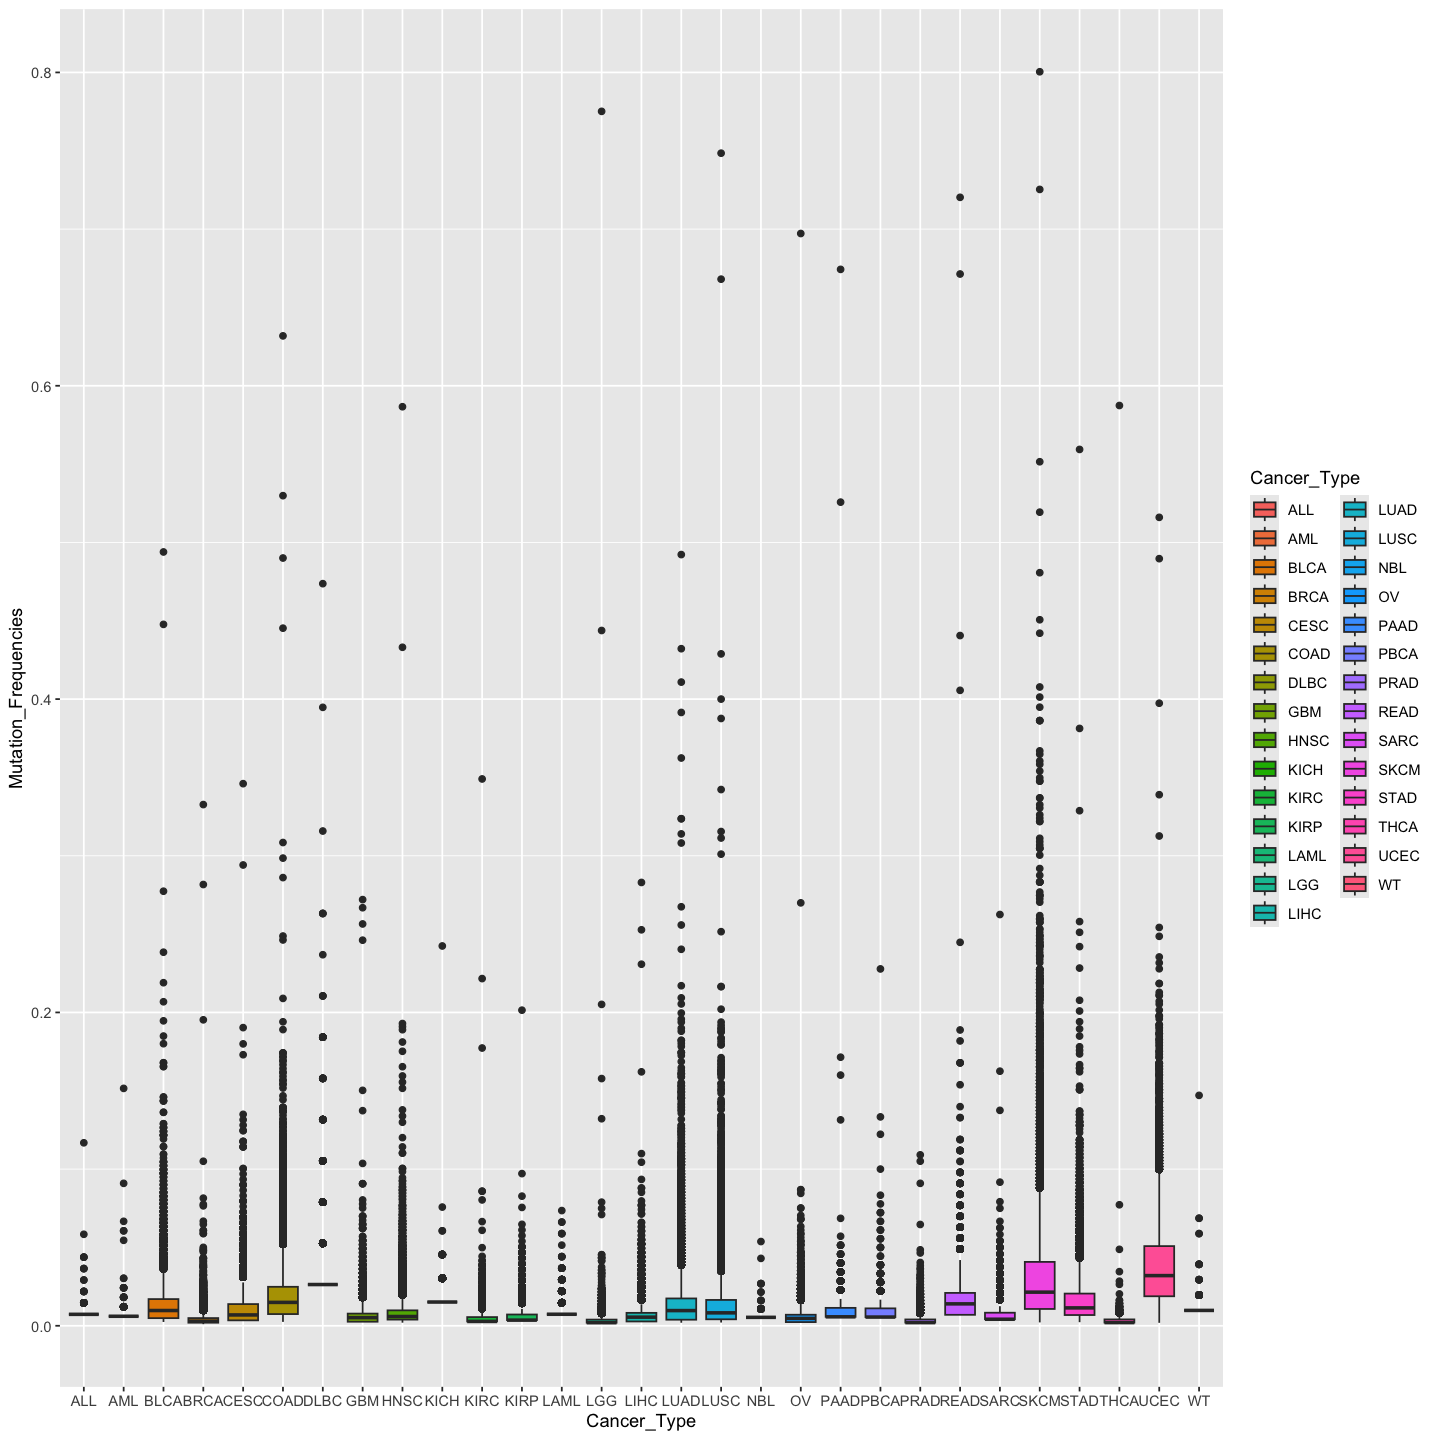

In [126]:
cancer_mut_frequency_df <- data.frame("Mutation_Frequencies"= as.numeric(cancer_type_label),
                                      "Cancer_Type"= mutation_freq_val)
ggplot(cancer_mut_frequency_df, aes(x=Cancer_Type, y=Mutation_Frequencies,
                                   fill=Cancer_Type)) + 
  geom_boxplot()

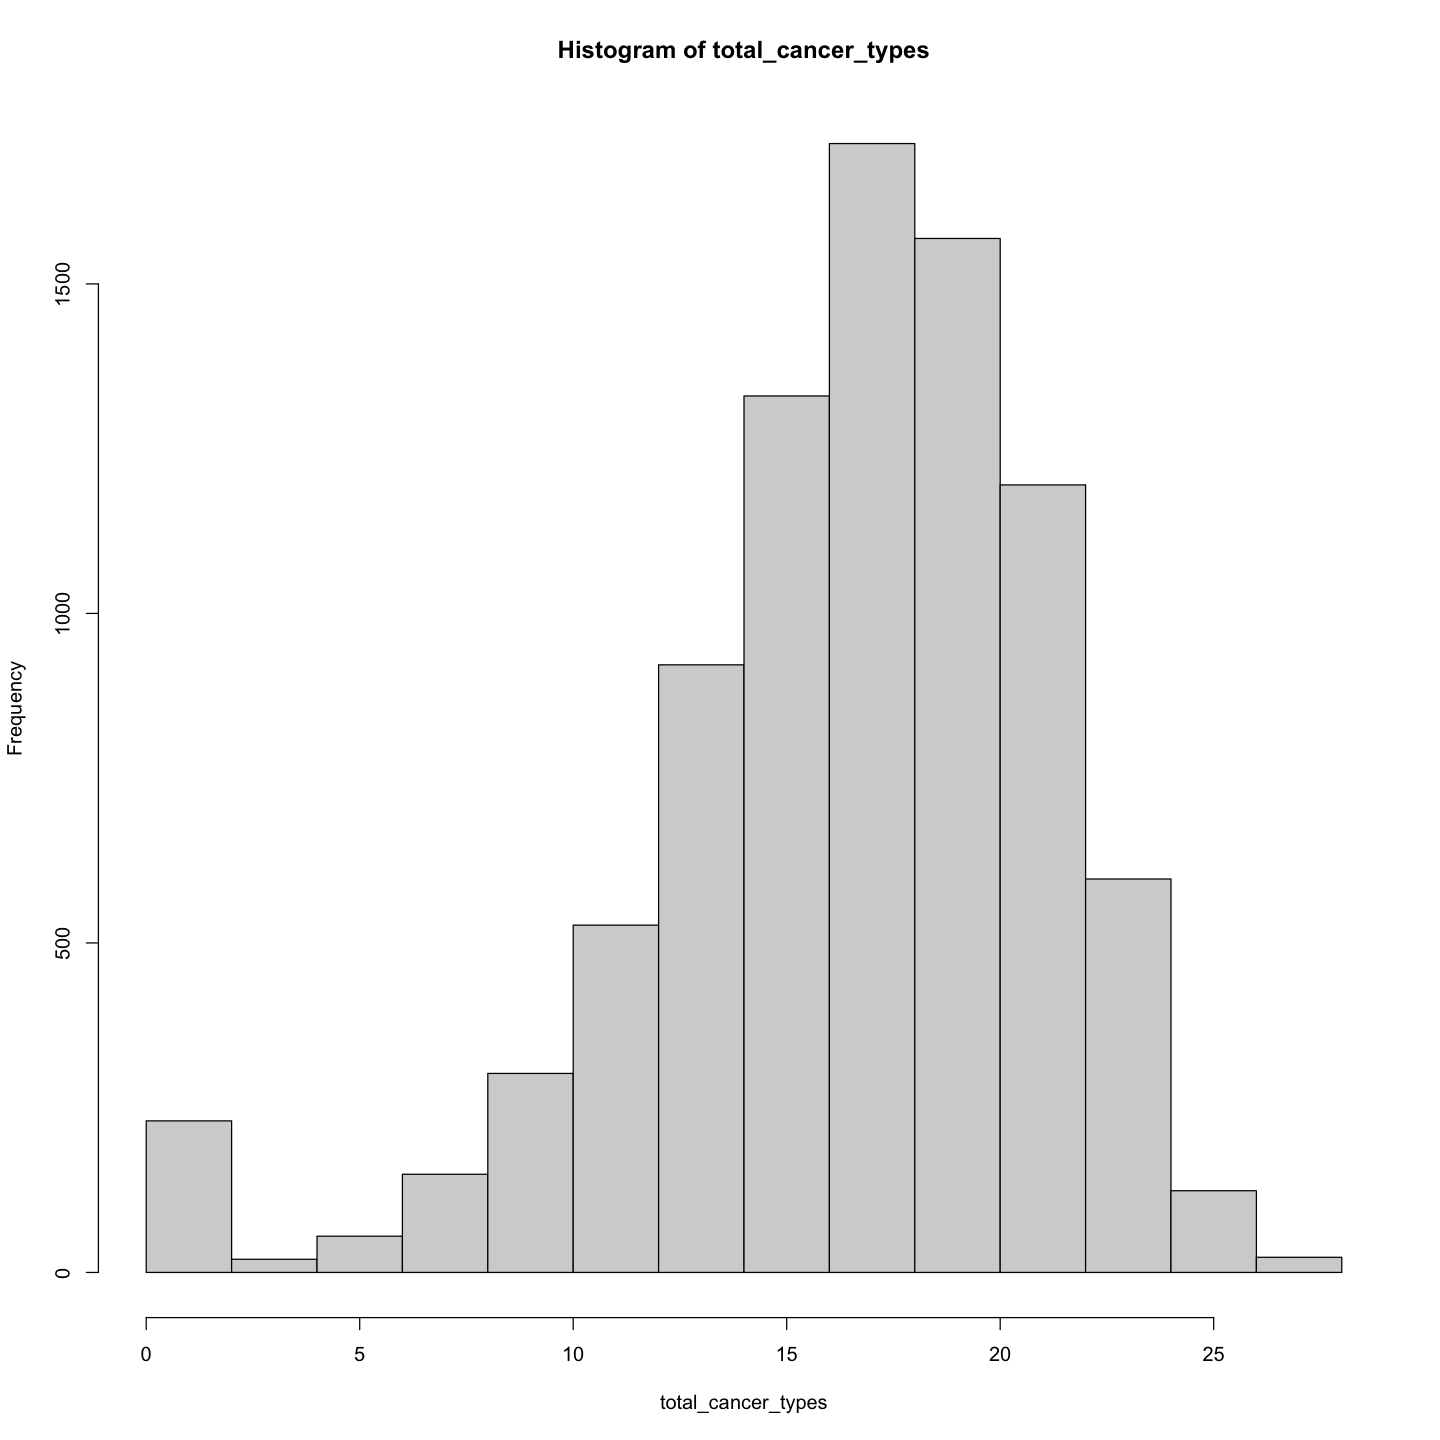

In [127]:
set.seed(5)
gene_list <- unlist(combined_recurrent)
total_cancer_types <- numeric(length(gene_list))
mut_freq_mat <- matrix(,nrow= length(gene_list), ncol= length(cancer_mut_freq))
rand_mut_freq_mat <- matrix(,nrow= length(gene_list), ncol= length(cancer_mut_freq))
for(i in 1:length(gene_list)){
    gene <- gene_list[i]
    in_list <- logical(length(cancer_mut_freq))
    for(j in 1:length(cancer_mut_freq)) {
        #cancer_mut_freq[[i]]$ %in% recurrent_wrs_list$upregulated[[j]]
        in_list[j] <- gene %in% cancer_mut_freq[[j]]$geneName
        
        if(gene %in% cancer_mut_freq[[j]]$geneName) {
            frequencies <- cancer_mut_freq[[j]]
            mut_freq_mat[i,j] <- frequencies$Freq[frequencies$geneName %in% gene][1]
            rand_mut_freq_mat[i,j] <- sample(frequencies$Freq,1)
        } else {
            mut_freq_mat[i,j] <- 0.00000000000001
            rand_mut_freq_mat[i,j] <- 0.00000000000001
        }
    }
    total_cancer_types[i] <- sum(in_list)
}

colnames(mut_freq_mat) <- names(cancer_mut_freq)
rownames(mut_freq_mat) <- names(gene_list)
colnames(rand_mut_freq_mat) <- names(cancer_mut_freq)
rownames(rand_mut_freq_mat) <- names(gene_list)

# across how many cancer types are these genes included in
hist(total_cancer_types)

In [128]:
for(i in c(6,16,17,25)) {
    cancer_type <- cancer_mut_freq[[i]]
    print(names(cancer_mut_freq)[i])
    print(head(cancer_type[order(cancer_type$Freq, decreasing=T),c(2,3)],10))
    
    for(j in 1:length(combined_recurrent)) {
        print(names(combined_recurrent)[j])
        current_mut_freq_gename <- cancer_type[cancer_type$geneName %in% combined_recurrent[[j]],]
        print(head(current_mut_freq_gename[order(current_mut_freq_gename$Freq, decreasing=T),c(2,3)],10))
    }
    print("###################")
}

[1] "COAD"
           Freq geneName
6719  0.6318408      APC
9514  0.5298507      TTN
7822  0.4900498     TP53
6517  0.4452736     KRAS
5033  0.3084577   PIK3CA
6136  0.2985075    SYNE1
14098 0.2860697    MUC16
9396  0.2487562    OBSCN
15708 0.2462687     FAT4
16371 0.2089552     RYR2
[1] "upregulated.regen"
           Freq geneName
9514  0.5298507      TTN
14098 0.2860697    MUC16
9117  0.1567164      DST
14419 0.1542289      NEB
4613  0.1442786    MUC5B
11860 0.1293532     TNXB
9107  0.1268657     SACS
8991  0.1194030    FREM2
15618 0.1169154     RELN
5818  0.1094527     FLNC
[1] "upregulated.stress"
            Freq geneName
11623 0.12189055    KMT2D
731   0.11691542    KMT2C
17444 0.11442786    TENM3
8841  0.10696517    TENM4
16988 0.10447761   ATP10A
18617 0.10447761    KMT2B
4600  0.09203980   ARID1A
90    0.08457711   CREBBP
1707  0.08457711     GNAS
16289 0.08208955     PEG3
[1] "upregulated.wound"
            Freq geneName
9117  0.15671642      DST
10550 0.12437811   COL6A3
54

In [129]:
lfc_files <- readRDS("../data/lfc_files.RDS")
upregulated_cancer_genes <- lfc_files[["total_up"]]

total_lfc_cancer_genes<- list()
for(i in names(upregulated_cancer_genes)) {
    total_lfc_cancer_genes[i] <- upregulated_cancer_genes[i]
}

summary(upregulated_cancer_genes)

                          Length Class  Mode   
TCGA-OV_vs_Ovary          14412  factor numeric
TCGA-UCS_vs_Uterus        11189  factor numeric
TCGA-UCEC_vs_Uterus       12264  factor numeric
TCGA-BRCA_vs_Breast        8505  factor numeric
TCGA-SKCM_vs_Skin          9894  factor numeric
TCGA-ACC_vs_Adrenal_Gland 10968  factor numeric
TCGA-THCA_vs_Thyroid      10669  factor numeric
TCGA-LUAD_vs_Lung         11410  factor numeric
TCGA-LUSC_vs_Lung         11169  factor numeric
TCGA-PAAD_vs_Pancreas     10331  factor numeric
TCGA-ESCA_vs_Esophagus     4964  factor numeric
TCGA-GBM_vs_Brain          6166  factor numeric
TCGA-STAD_vs_Stomach      11056  factor numeric
TCGA-COAD_vs_Colon         9773  factor numeric
TCGA-PRAD_vs_Prostate     15291  factor numeric
TCGA-TGCT_vs_Testis       14713  factor numeric
TCGA-LIHC_vs_Liver        13542  factor numeric
TCGA-KICH_vs_Kidney       13921  factor numeric
TCGA-KIRC_vs_Kidney        6760  factor numeric
TCGA-KIRP_vs_Kidney       10959  factor 

In [130]:
mutation_matrix <- numeric(length(combined_recurrent))
regression_pvalue_score <- numeric()
regression_pvalue_driver <- numeric()
regression_pvalue_deg <- numeric()
for(i in 1:length(cancer_mut_freq)) {
    no_na <- na.omit(cancer_mut_freq[[i]])
    deg_index <- which(gsub('TCGA-','',gsub('_.*','',names(total_lfc_cancer_genes))) == names(cancer_mut_freq)[i])
    deg_index
    freq_df <- no_na

    ordered_freqs <- freq_df[order(freq_df$Freq, decreasing = T),]
    thresh <- min(ordered_freqs$Freq[1:((nrow(ordered_freqs))*.05)])

    back_thresh_freq <- freq_df[freq_df$Freq > thresh,]
    
    
    exp_freq_vec <- numeric(length(combined_recurrent))
    for(j in 1:length(combined_recurrent)){
        current_set <- combined_recurrent[[j]]
        current_name <- names(combined_recurrent)[j]
        current_foreground_total <- freq_df[freq_df$geneName %in% current_set,]
        
        fore_thresh_freq <- current_foreground_total[current_foreground_total$Freq > thresh,]
        
        exp_fisher_contingency = rbind(c(nrow(fore_thresh_freq),nrow(current_foreground_total)-nrow(fore_thresh_freq)),
                                       c(nrow(back_thresh_freq),nrow(freq_df)-nrow(back_thresh_freq)))
        
        thresh_test <- fisher.test(exp_fisher_contingency)
        
#         print("significant and positive")
#         print(exp_fisher_contingency)
#         print(paste("Pvalue: ", fisher.test(exp_fisher_contingency)$p.value, sep=""))
#         print(paste("Odds: ", fisher.test(exp_fisher_contingency)$estimate, sep=""))
#         print("")
        
        
        if(thresh_test$p.value < .05) {
            exp_freq_vec[j] = thresh_test$estimate
        } else { exp_freq_vec[j] = -1}
    }
    
    mutation_matrix <- cbind(mutation_matrix, exp_freq_vec)
    
}

mutation_matrix <- mutation_matrix[,2:ncol(mutation_matrix)]
colnames(mutation_matrix) <- names(cancer_mut_freq)
rownames(mutation_matrix) <- names(combined_recurrent)
mutation_matrix <- t(mutation_matrix)

In [131]:
mutation_matrix

,upregulated.regen,upregulated.stress,upregulated.wound,downregulated.regen,downregulated.stress,downregulated.wound,msigdb.regen,msigdb.wound,msigdb.stress
ALL,-1.000000,6.287227,-1,-1.000000,-1.0000000,-1,17.853612,10.787987,-1.0000000
AML,-1.000000,-1.000000,-1,-1.000000,-1.0000000,-1,-1.000000,-1.000000,-1.0000000
BLCA,-1.000000,-1.000000,-1,1.978665,0.5677698,-1,-1.000000,1.941606,1.4988636
BRCA,1.374128,-1.000000,-1,1.839253,-1.0000000,-1,1.976051,2.008094,1.2704532
CESC,-1.000000,-1.000000,-1,1.824628,0.5929771,-1,-1.000000,1.664471,1.4069105
COAD,-1.000000,-1.000000,-1,2.214461,0.5991432,-1,2.021058,1.837024,-1.0000000
DLBC,-1.000000,-1.000000,-1,2.588909,-1.0000000,-1,-1.000000,-1.000000,-1.0000000
GBM,1.530398,-1.000000,-1,2.368525,-1.0000000,-1,2.249500,2.597609,-1.0000000
HNSC,-1.000000,-1.000000,-1,1.772582,0.5787626,-1,-1.000000,1.859647,-1.0000000
KICH,-1.000000,-1.000000,-1,-1.000000,-1.0000000,-1,-1.000000,-1.000000,-1.0000000


In [132]:
row_labels_mut <- factor(gsub("^.*\\.","",names(combined_recurrent)))
levels(row_labels_mut) <- c("RG", "SR", "WH")
heatmap_annot_mut <- data.frame("Experiment_Type"=row_labels_mut)
rownames(heatmap_annot_mut) <- names(combined_recurrent)

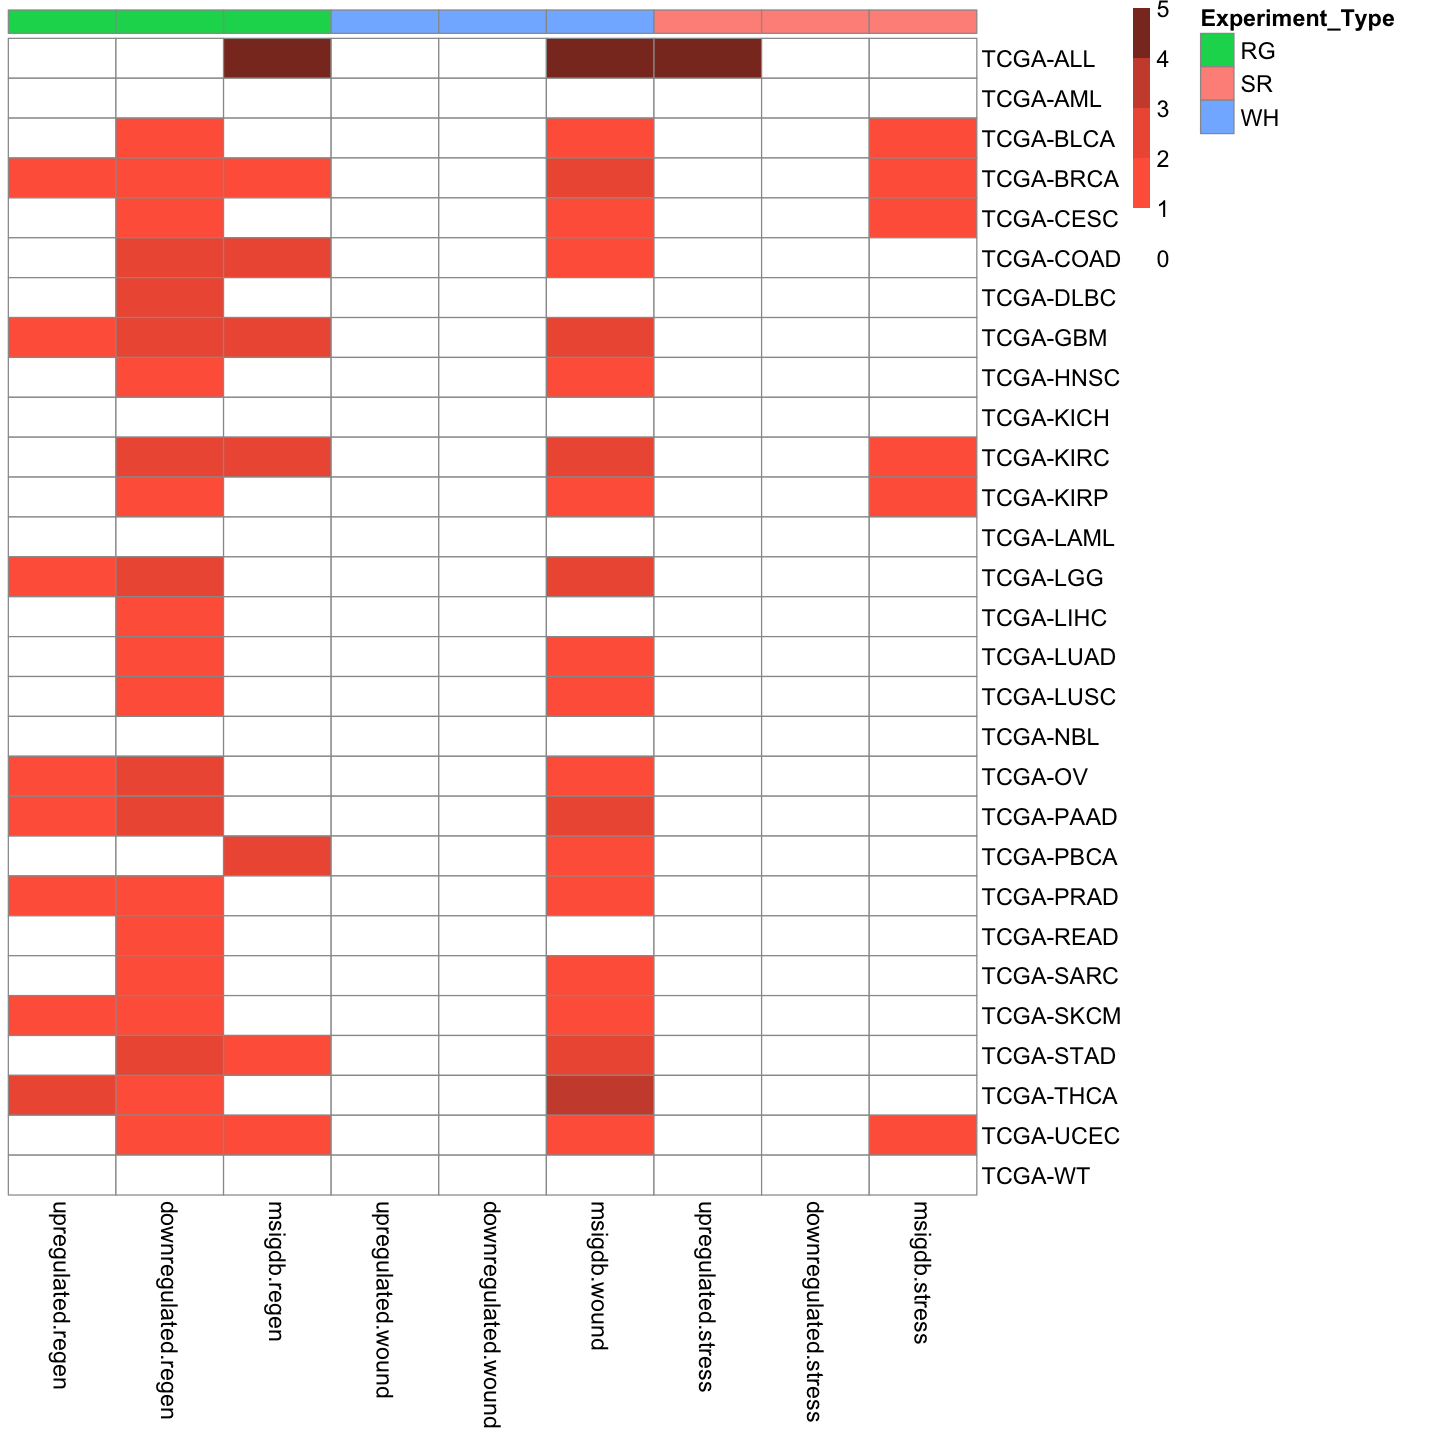

In [133]:
rownames(mutation_matrix) <- paste0("TCGA-", rownames(mutation_matrix))
options(repr.plot.width=12, repr.plot.height=12)

len_mut_list <- sapply(mutation_matrix[,c(1,2,3)], length)

pheatmap(mutation_matrix[,c('upregulated.regen','downregulated.regen', 'msigdb.regen',
                       'upregulated.wound','downregulated.wound','msigdb.wound',
                       'upregulated.stress','downregulated.stress','msigdb.stress')],
         annotation_col=heatmap_annot_mut, annotation_names_col = F,
         color = colorRampPalette(c("white",'tomato1',"tomato2", "tomato3", "tomato4"))(5),
         fontsize = 14,
         breaks = c(0, 1, 2, 3, 4, 5),cluster_rows=F, cluster_cols=F)

In [134]:
colnames(mutation_matrix)

[1] "upregulated.regen"    "upregulated.stress"   "upregulated.wound"   
[4] "downregulated.regen"  "downregulated.stress" "downregulated.wound" 
[7] "msigdb.regen"         "msigdb.wound"         "msigdb.stress"

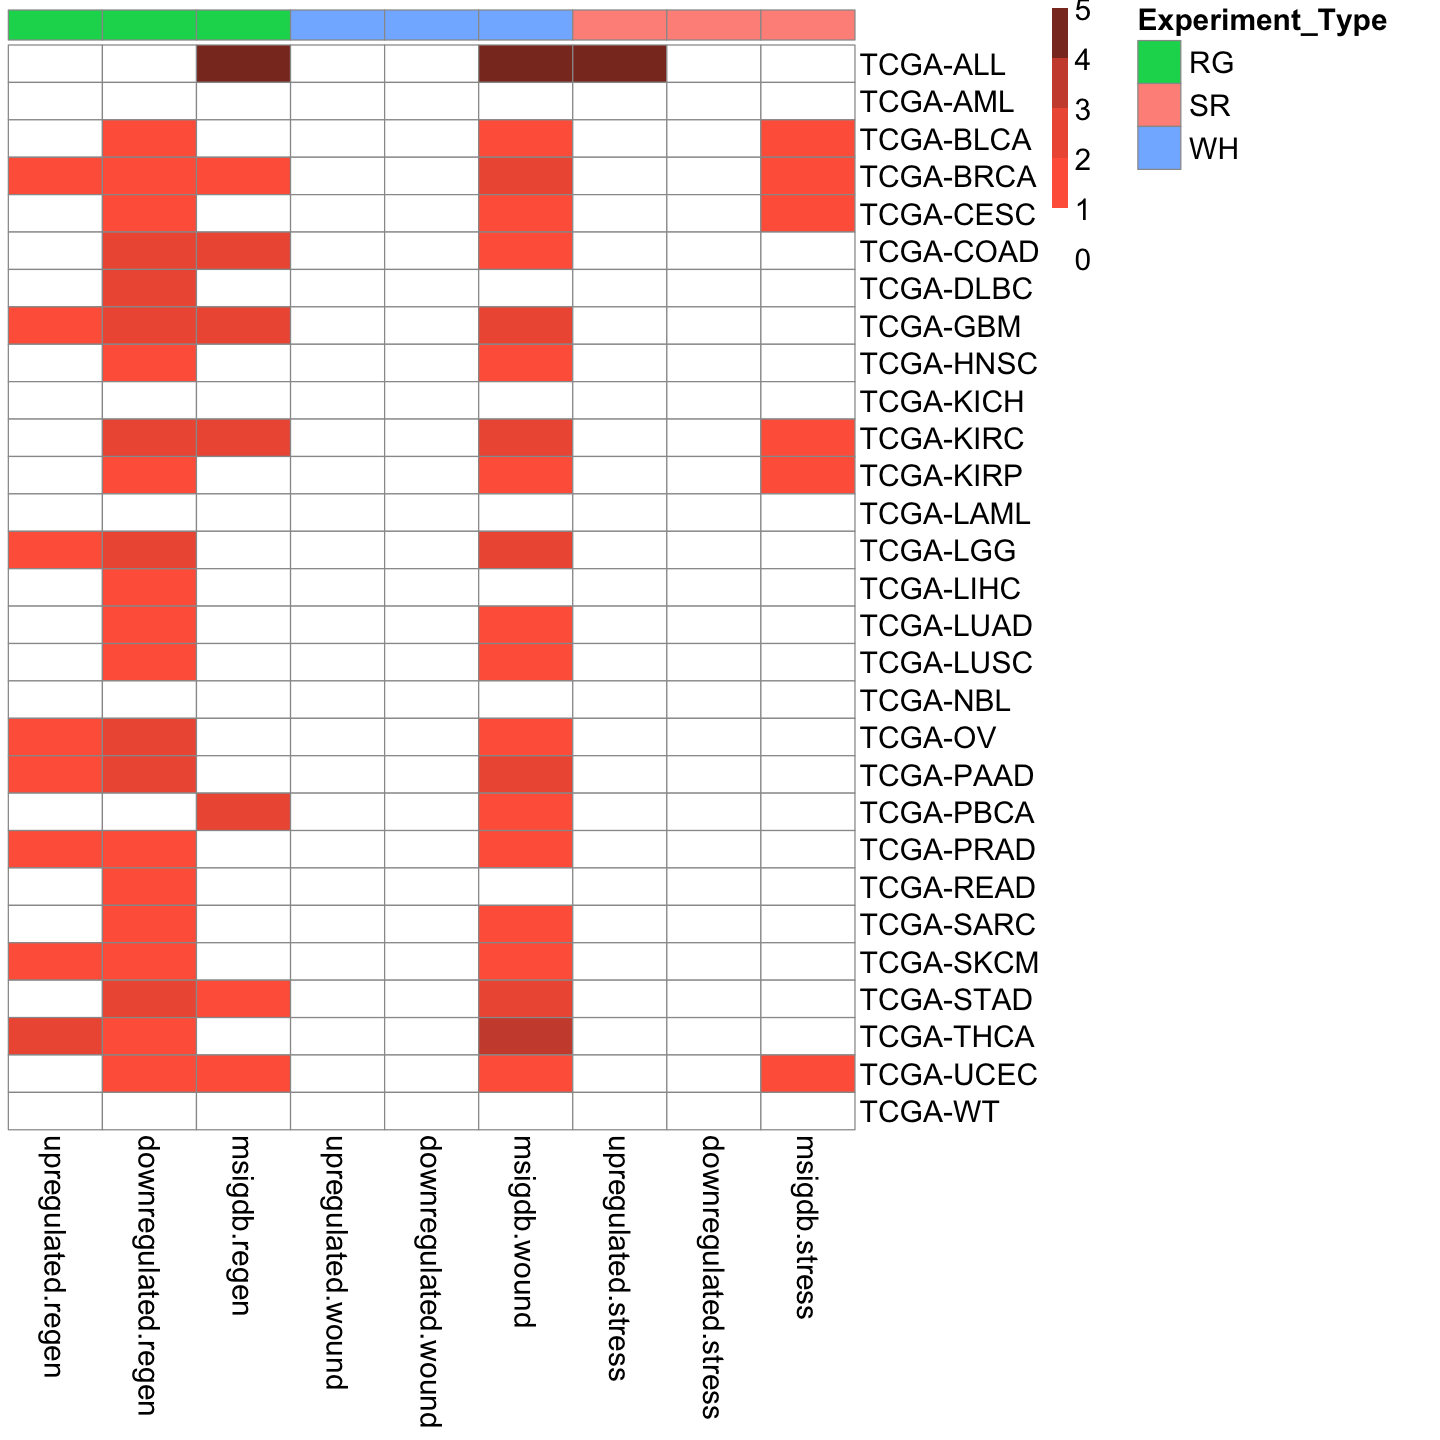

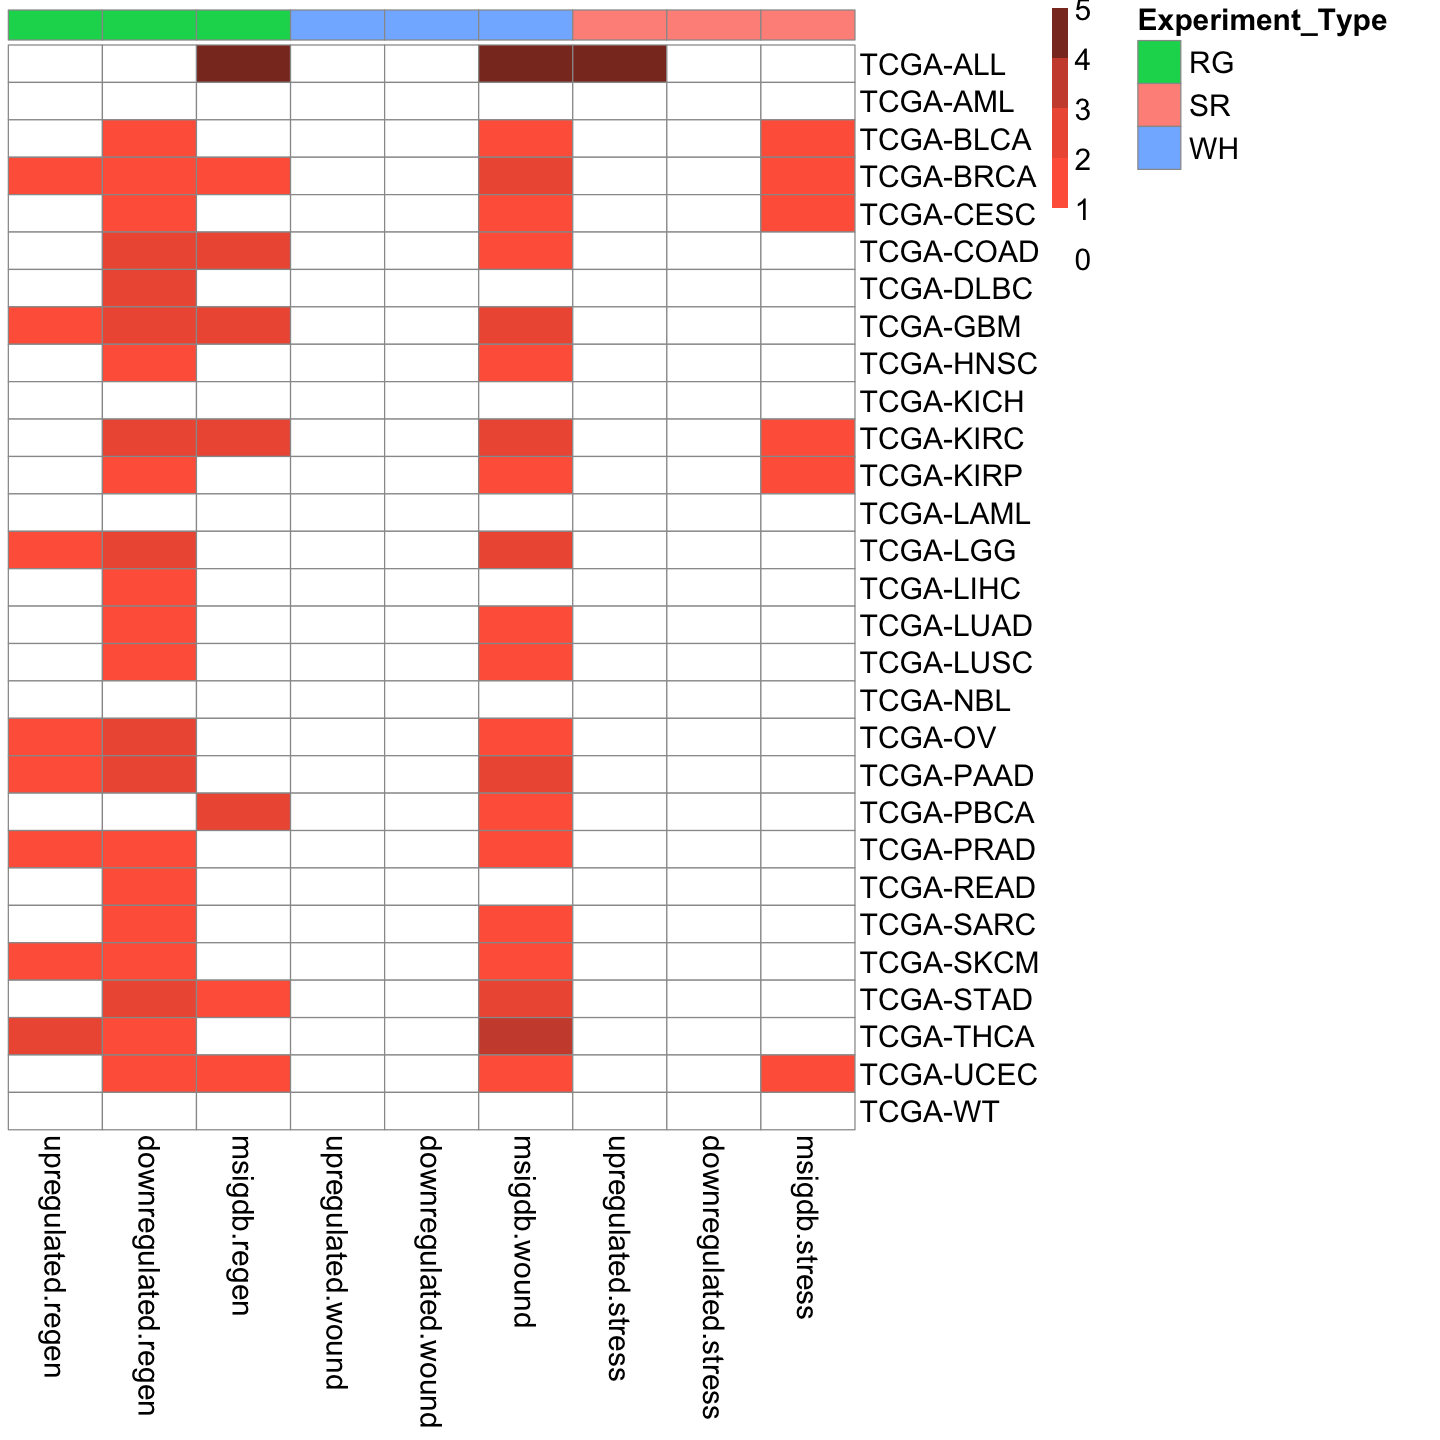

In [135]:
### Modified code using Piyush's approach
library(pheatmap)
library(grid)
library(ggplot2)

# Capture the plot output
p <- grid::grid.grabExpr(
  pheatmap(mutation_matrix[,c('upregulated.regen','downregulated.regen', 'msigdb.regen',
                              'upregulated.wound','downregulated.wound','msigdb.wound',
                              'upregulated.stress','downregulated.stress','msigdb.stress')],
           annotation_col = heatmap_annot_mut,
           annotation_names_col = FALSE,
           color = colorRampPalette(c("white", "tomato1", "tomato2", "tomato3", "tomato4"))(5),
           fontsize = 18,
           breaks = c(0, 1, 2, 3, 4, 5),
           cluster_rows = FALSE,
           cluster_cols = FALSE)
)

# Save the captured plot using ggsave
ggsave("~/Desktop/Deactivating_mutation_heatmap.pdf", plot = p, width = 12, height = 12, dpi = 600, units = "in")


In [100]:
options(repr.plot.width=12, repr.plot.height=12)

In [101]:
predicted_scores_df<- data.frame(fread("../Briefings_paper/STRING_work/ml/based_on_piyush_train_dataset/genome_wide/predicted_sccores_df.csv")[-c(1)])
colnames(predicted_scores_df) <- c("gene_names","score", "driver_status")
rownames(predicted_scores_df)<- predicted_scores_df$gene_names
head(predicted_scores_df)

,gene_names,score,driver_status
,<chr>,<dbl>,<int>
ASXL2,ASXL2,1,1
CCNC,CCNC,1,1
CCR4,CCR4,1,1
CD28,CD28,1,1
CD4,CD4,1,1
CDH10,CDH10,1,1


In [102]:
regression_function <- function(driver_scores, deg_list, y_value_list){
    
    
    deg_status <- 1*(driver_scores$gene_names %in% deg_list)
    regression_df  <- data.frame(driver_scores, deg_status, y_value_list)
    
    fit <- summary(lm(y_value_list ~ score + driver_status + deg_status, regression_df))
    
    return(fit$coefficients[,4])
    
}

In [103]:
predicted_scores_list <- list()
#predicted_scores_list[["High_NonCancer"]] <- fread("../ppi_analysis/extra_files/high_non_cancer.txt", header=F)$V1
#predicted_scores_list[["Goldset_Ccancer"]] <- fread("../ppi_analysis/extra_files/goldset_cancer.txt", header=F)$V1
#predicted_scores_list[["Low_NonCancer"]] <- fread("../ppi_analysis/extra_files/low_non_cancer.txt", header=F)$V1

predicted_scores_list[["High_NonCancer"]] <- fread("../Briefings_paper/STRING_work/ml/based_on_piyush_train_dataset/genome_wide/UNITe_Top2000", header=F)$V1
predicted_scores_list[["Goldset_Ccancer"]] <- fread("../ppi_analysis/extra_files/goldset_cancer.txt", header=F)$V1
predicted_scores_list[["Low_NonCancer"]] <- fread("../Briefings_paper/STRING_work/ml/based_on_piyush_train_dataset/genome_wide/UNITe_Bottom2000", header=F)$V1

In [104]:
combined_recurrent <- predicted_scores_list
mutation_matrix <- numeric(length(combined_recurrent))
regression_pvalue_score <- numeric()
regression_pvalue_driver <- numeric()
regression_pvalue_deg <- numeric()
ratio <- numeric()
for(i in 1:length(cancer_mut_freq)) {
    no_na <- na.omit(cancer_mut_freq[[i]])
    
    deg_index <- which(gsub('TCGA-','',gsub('_.*','',names(total_lfc_cancer_genes))) == names(cancer_mut_freq)[i])
    deg_index
    if(length(deg_index) != 0) {
        degs <- total_lfc_cancer_genes[[deg_index]][total_lfc_cancer_genes[[deg_index]] %in% predicted_scores_list[['High_NonCancer']]]
        total_degs <- total_lfc_cancer_genes[[deg_index]]
        low_degs <- total_lfc_cancer_genes[[deg_index]][total_lfc_cancer_genes[[deg_index]] %in% combined_recurrent[['Low_   NonCancer']]]
    }
    else {
        degs <- '' 
        total_degs <- ''
        low_degs <- ''
    }
    
    
    
    current_list <- combined_recurrent
    current_list[["HNC_DEGs"]] <- degs
    current_list[["LNC_DEGs"]] <- low_degs
    freq_df <- no_na
    
    
    ## regression code
    reg_df <- freq_df[freq_df$geneName %in% predicted_scores_df$gene_names,]
    reg_df <- reg_df[!duplicated(reg_df$geneName),] 
    final_prediction_y <- reg_df[order(reg_df$geneName),]$Freq

    current_predicted_scores <- predicted_scores_df[predicted_scores_df$gene_names %in% reg_df$geneName,]
    current_predicted_scores <- current_predicted_scores[order(current_predicted_scores$gene_names),]
    
    pvals <- regression_function(current_predicted_scores, total_degs, final_prediction_y)
    
    regression_pvalue_score <- append(regression_pvalue_score,pvals["score"],length(regression_pvalue_score))
    regression_pvalue_driver <- append(regression_pvalue_driver,pvals["driver_status"],length(regression_pvalue_driver))
    regression_pvalue_deg <- append(regression_pvalue_deg,pvals["deg_status"],length(regression_pvalue_deg))
    
    
    ## end regression code

    ordered_freqs <- freq_df[order(freq_df$Freq, decreasing = T),]
    thresh <- min(ordered_freqs$Freq[1:((nrow(ordered_freqs))*.1)])

    back_thresh_freq <- freq_df[freq_df$Freq > thresh,]
    
    combined_recurrent[['HNC_DEGs']] <- degs
    combined_recurrent[["LNC_DEGs"]] <- low_degs
    
    exp_freq_vec <- numeric(length(combined_recurrent))
    for(j in 1:length(combined_recurrent)){
        current_set <- combined_recurrent[[j]]
        current_name <- names(combined_recurrent)[j]
        current_foreground_total <- freq_df[freq_df$geneName %in% current_set,]
        
        fore_thresh_freq <- current_foreground_total[current_foreground_total$Freq > thresh,]
        
        exp_fisher_contingency = rbind(c(nrow(fore_thresh_freq),nrow(current_foreground_total)-nrow(fore_thresh_freq)),
                                       c(nrow(back_thresh_freq),nrow(freq_df)-nrow(back_thresh_freq)))
        
        thresh_test <- fisher.test(exp_fisher_contingency)
        
#         print("significant and positive")
#         print(exp_fisher_contingency)
#         print(paste("Pvalue: ", fisher.test(exp_fisher_contingency)$p.value, sep=""))
#         print(paste("Odds: ", fisher.test(exp_fisher_contingency)$estimate, sep=""))
#         print("")
        
        
        if(thresh_test$p.value < .05) {
            exp_freq_vec[j] = thresh_test$estimate
        } else { exp_freq_vec[j] = -1}
    }
    
    mutation_matrix <- cbind(mutation_matrix, exp_freq_vec)
    
}

mutation_matrix <- mutation_matrix[,2:ncol(mutation_matrix)]
colnames(mutation_matrix) <- names(cancer_mut_freq)
rownames(mutation_matrix) <- names(combined_recurrent)
mutation_matrix <- t(mutation_matrix)

regression_pvalues <- data.frame("prediction_score" = regression_pvalue_score,
                                 "driver_status" = regression_pvalue_driver,
                                 "deg_status" = regression_pvalue_deg)
rownames(regression_pvalues) <- names(cancer_mut_freq)

Warning message in cbind(mutation_matrix, exp_freq_vec):
“number of rows of result is not a multiple of vector length (arg 1)”


In [105]:
mutation_matrix

,High_NonCancer,Goldset_Ccancer,Low_NonCancer,HNC_DEGs,LNC_DEGs
ALL,-1.000000,4.664699,-1.0000000,-1.0000000,-1
AML,-1.000000,7.811686,-1.0000000,-1.0000000,-1
BLCA,1.301652,4.990892,0.5559476,2.9335053,-1
BRCA,1.320134,3.852528,0.7023594,-1.0000000,-1
CESC,1.274881,3.773855,0.7738436,-1.0000000,-1
COAD,1.373619,4.064557,0.5854689,2.0528214,-1
DLBC,-1.000000,3.544504,-1.0000000,-1.0000000,-1
GBM,-1.000000,3.033278,0.6843520,0.4984158,-1
HNSC,-1.000000,3.430189,0.6567796,-1.0000000,-1
KICH,-1.000000,-1.000000,-1.0000000,-1.0000000,-1


In [106]:
get_fraction_dataset <- function(dataset_1, dataset_2){
    
    
    dataset1_names <- names(dataset_1)

    dataset2_names <- names(dataset_2)
    
    # dfs to return
    fractionDF <- data.frame("CTs" = dataset2_names)
    
    for(i in 1:length(dataset_1)) {
        current_vec <- numeric(length = length(dataset_1))
        for(j in 1:length(dataset_2)) {
            
            current_vec[j] <- sum(dataset_1[[i]] %in% dataset_2[[j]])/length(dataset_1[[i]])
            
        }
        fractionDF <- cbind(fractionDF, current_vec) 
    }
    
    final_fractionDF <- fractionDF[,2:length(fractionDF)]
    colnames(final_fractionDF) <- dataset1_names
    rownames(final_fractionDF) <- dataset2_names
    
    return(final_fractionDF)
    
}

,High_NonCancer,Goldset_Ccancer,Low_NonCancer
,<dbl>,<dbl>,<dbl>
ALL,0.0020,0.03282828,0.0015
AML,0.0020,0.05050505,0.0000
BLCA,0.2265,0.48989899,0.0885
BRCA,0.2450,0.51767677,0.1170
CESC,0.2100,0.40404040,0.0990
COAD,0.2700,0.50000000,0.1185
DLBC,0.0410,0.13131313,0.0220
GBM,0.2185,0.36616162,0.1010
HNSC,0.2315,0.39646465,0.1055


,Goldset.vs.High,Goldset.vs.Low,High.vs.Low
,<dbl>,<dbl>,<dbl>
ALL,16.414141,21.885522,1.333333
AML,25.252525,Inf,Inf
BLCA,2.162909,5.535582,2.559322
BRCA,2.112966,4.424588,2.094017
CESC,1.924002,4.081216,2.121212
COAD,1.851852,4.219409,2.278481
DLBC,3.202759,5.968779,1.863636
GBM,1.675797,3.625363,2.163366
HNSC,1.712590,3.757959,2.194313


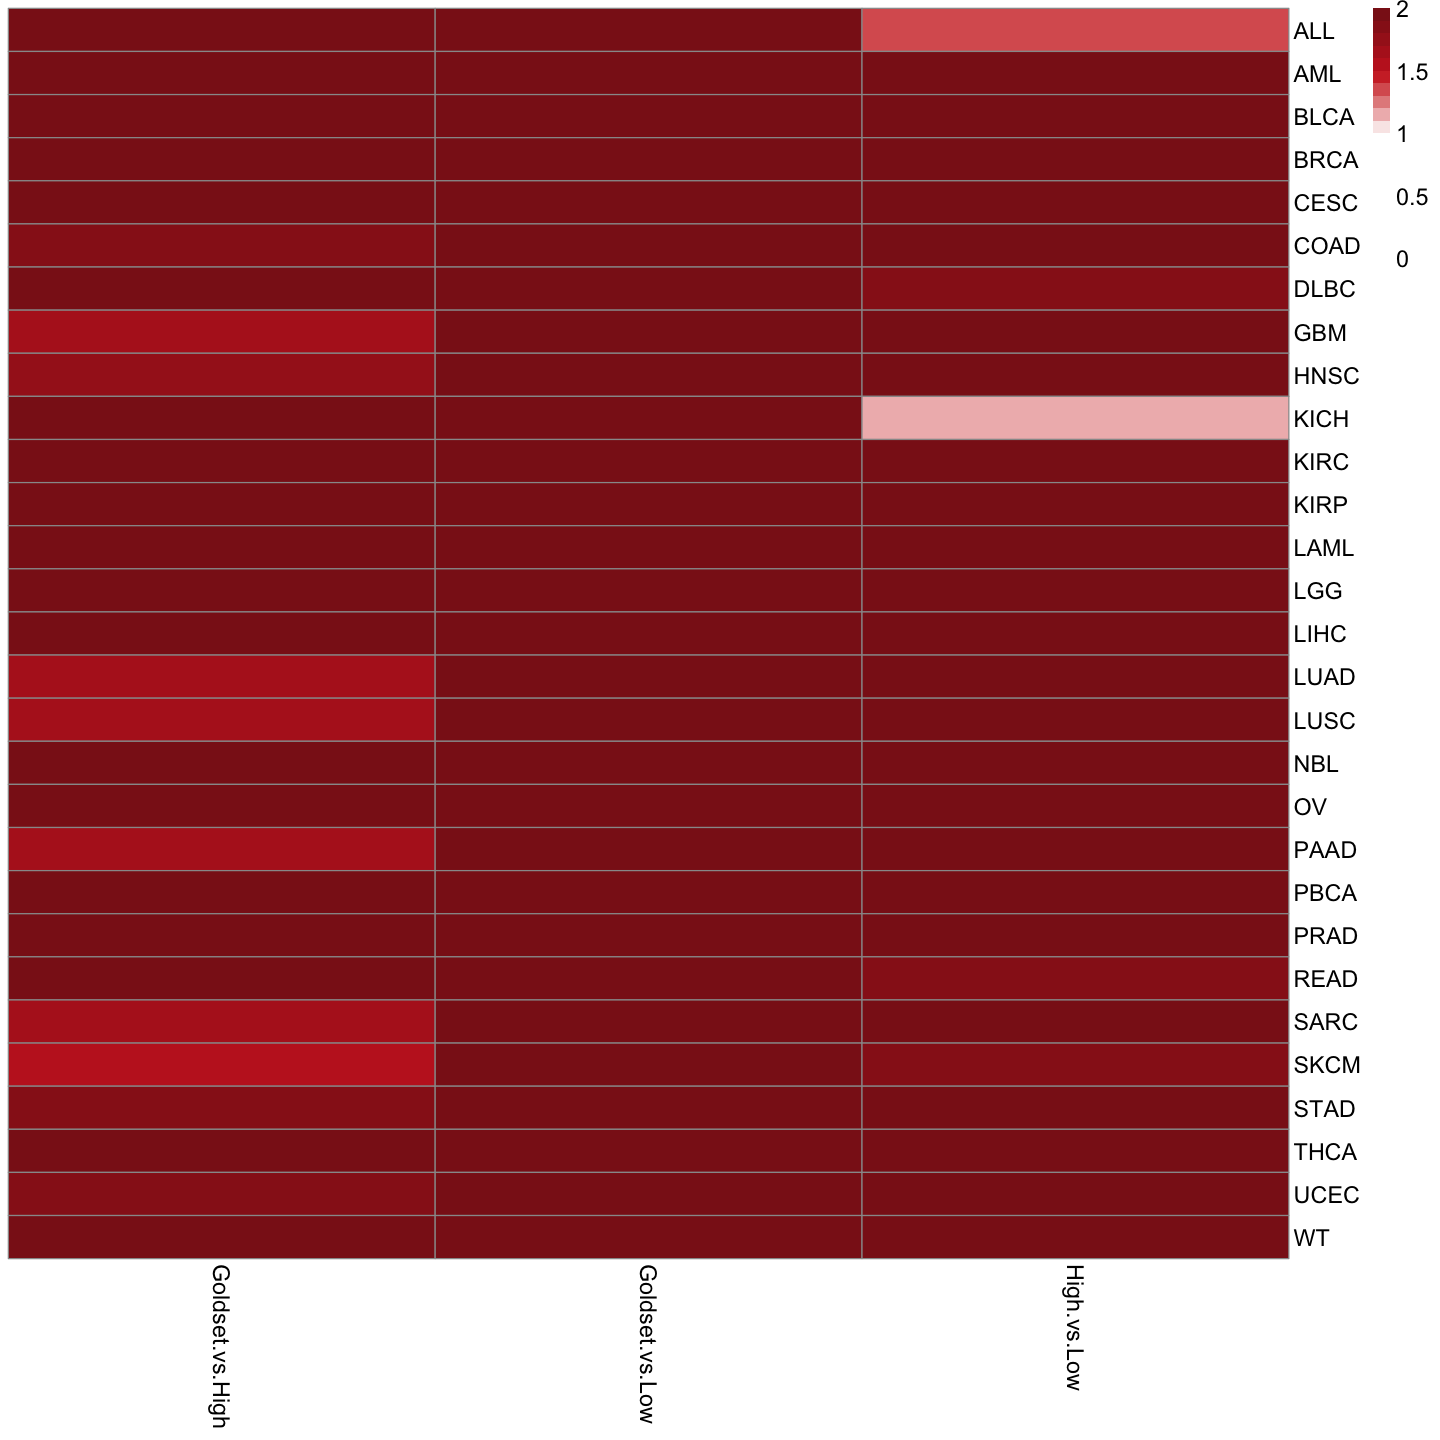

In [107]:
frequent_mutations <- list()
for(i in 1:length(cancer_mut_freq)) {
    no_na <- na.omit(cancer_mut_freq[[i]])
    freq_df <- no_na
    ordered_freqs <- freq_df[order(freq_df$Freq, decreasing = T),]
    thresh <- min(ordered_freqs$Freq[1:((nrow(ordered_freqs))*.25)])

    back_thresh_freq <- freq_df[freq_df$Freq > thresh,]
    frequent_mutations[[names(cancer_mut_freq)[i]]] <- back_thresh_freq$geneName
    
}

deg_fraction_df <- get_fraction_dataset(predicted_scores_list, frequent_mutations)
deg_fraction_df
fraction_ratioDF <- data.frame("Goldset vs High" = deg_fraction_df$Goldset_Ccancer/deg_fraction_df$High_NonCancer,
                               "Goldset vs Low" = deg_fraction_df$Goldset_Ccancer/deg_fraction_df$Low_NonCancer,
                               "High vs Low" = deg_fraction_df$High_NonCancer/deg_fraction_df$Low_NonCancer)
rownames(fraction_ratioDF) <- rownames(deg_fraction_df)
fraction_ratioDF
pheatmap(fraction_ratioDF, cluster_rows=F, cluster_cols=F,
         color = colorRampPalette(c('white',"white", "white", "firebrick3", "firebrick4"))(20),
         fontsize = 14,
         breaks = seq(0,2,.1))

In [108]:
reshape2::melt(fraction_ratioDF)

No id variables; using all as measure variables



variable,value
<fct>,<dbl>
Goldset.vs.High,16.414141
Goldset.vs.High,25.252525
Goldset.vs.High,2.162909
Goldset.vs.High,2.112966
Goldset.vs.High,1.924002
Goldset.vs.High,1.851852
Goldset.vs.High,3.202759
Goldset.vs.High,1.675797
Goldset.vs.High,1.712590


In [109]:
summary(reshape2::melt(fraction_ratioDF)$value)[5]

No id variables; using all as measure variables



 3rd Qu. 
4.276328 

In [110]:
mutation_matrix

,High_NonCancer,Goldset_Ccancer,Low_NonCancer,HNC_DEGs,LNC_DEGs
ALL,-1.000000,4.664699,-1.0000000,-1.0000000,-1
AML,-1.000000,7.811686,-1.0000000,-1.0000000,-1
BLCA,1.301652,4.990892,0.5559476,2.9335053,-1
BRCA,1.320134,3.852528,0.7023594,-1.0000000,-1
CESC,1.274881,3.773855,0.7738436,-1.0000000,-1
COAD,1.373619,4.064557,0.5854689,2.0528214,-1
DLBC,-1.000000,3.544504,-1.0000000,-1.0000000,-1
GBM,-1.000000,3.033278,0.6843520,0.4984158,-1
HNSC,-1.000000,3.430189,0.6567796,-1.0000000,-1
KICH,-1.000000,-1.000000,-1.0000000,-1.0000000,-1


No id variables; using all as measure variables

No id variables; using all as measure variables

Warning message:
“Removed 22 rows containing non-finite outside the scale range (`stat_boxplot()`).”


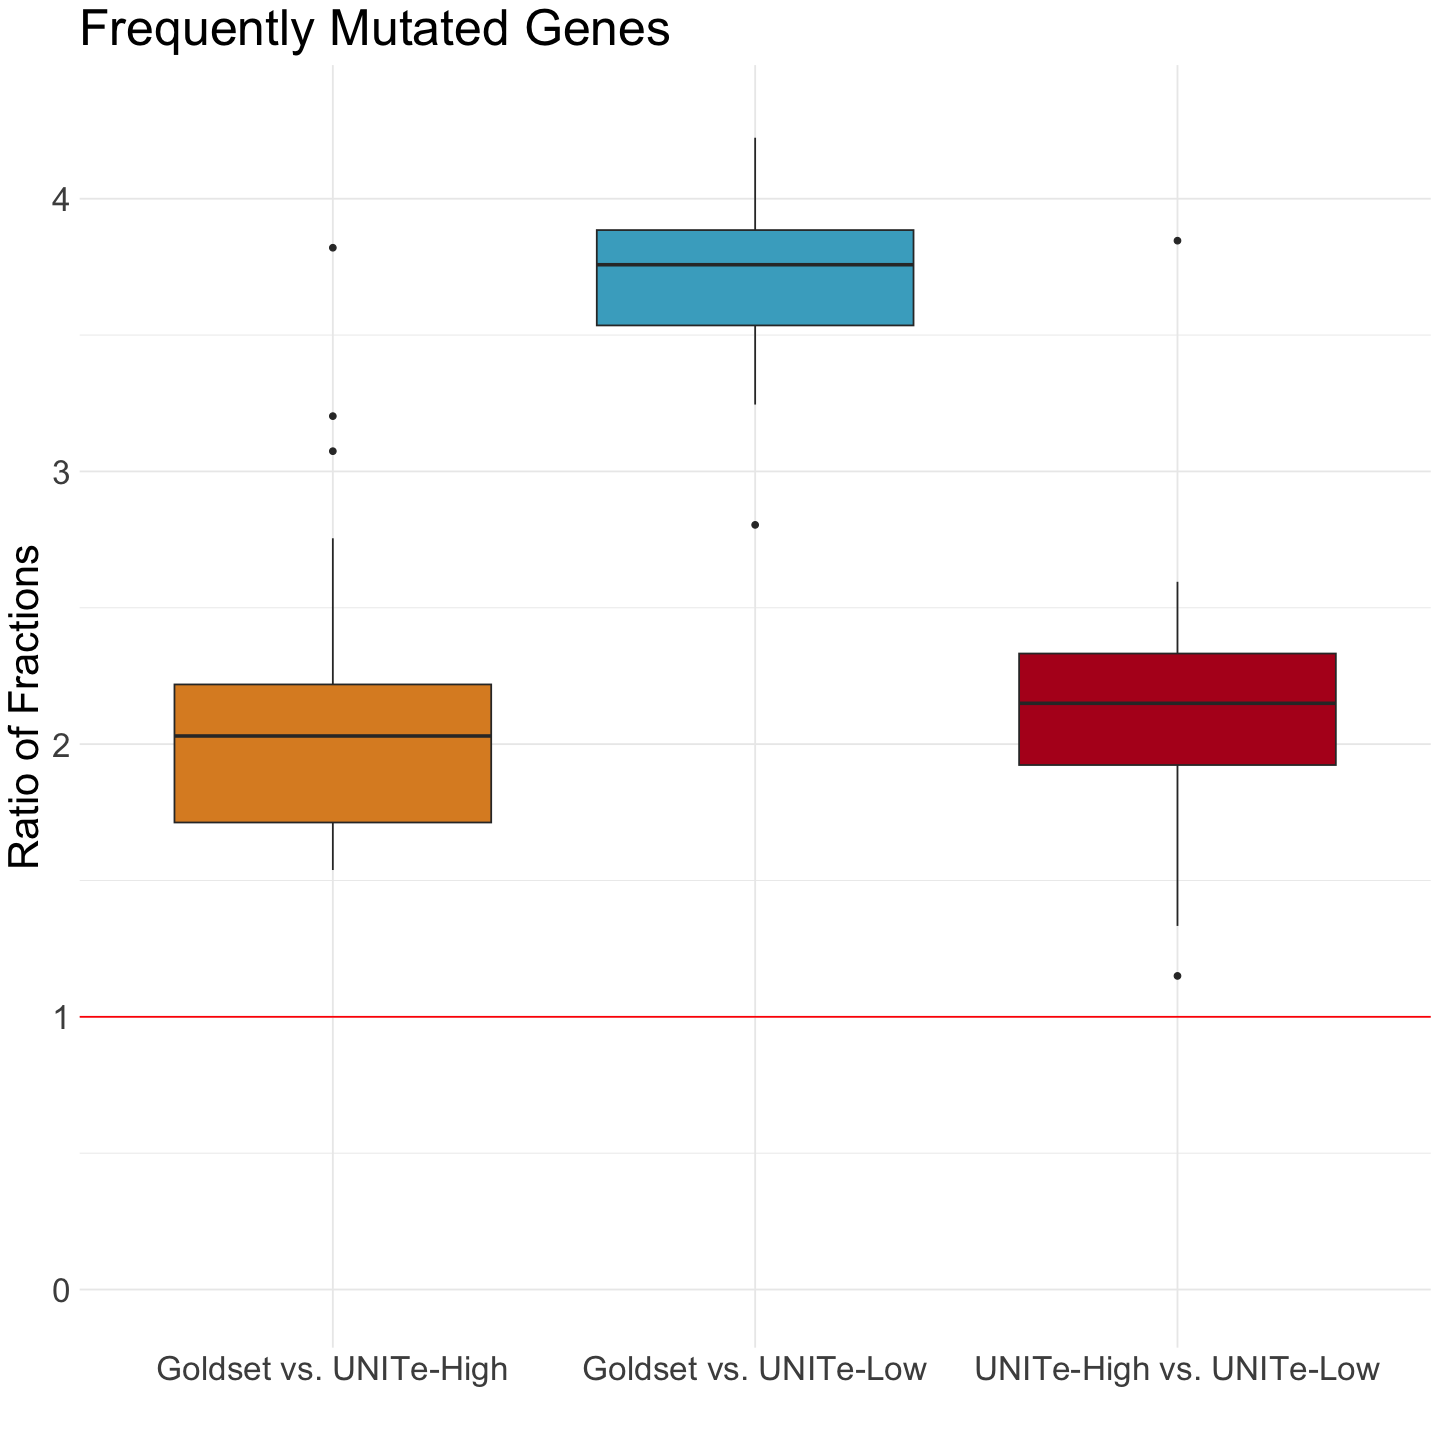

In [111]:
library("wesanderson")
ggplot(reshape2::melt(fraction_ratioDF), aes(y=value,x=variable, fill= variable)) +  # This is the plot function
  geom_boxplot()  +
  scale_y_continuous(limits=c(0,summary(reshape2::melt(fraction_ratioDF)$value)[5])) +
  geom_hline(aes(yintercept=1), colour="red") +
theme_minimal() +
scale_fill_manual(values = wes_palette("FantasticFox1", n = 3,type = "continuous"),
                    name = "Categories")+ 
    theme(text = element_text(size=25),
          legend.position="none") +
scale_x_discrete(name ="",
                 labels=c("Goldset vs. UNITe-High",
                          "Goldset vs. UNITe-Low",
                          "UNITe-High vs. UNITe-Low"))+
labs(title="Frequently Mutated Genes",x="", y = "Ratio of Fractions")

In [112]:
flattened_comparisons <-reshape2::melt(reshape2::melt(fraction_ratioDF))
unique(flattened_comparisons$variable)

No id variables; using all as measure variables

Using variable as id variables



[1] Goldset.vs.High Goldset.vs.Low  High.vs.Low    
Levels: Goldset.vs.High Goldset.vs.Low High.vs.Low

In [113]:
gs_mut_frac <- flattened_comparisons[flattened_comparisons$variable == "Goldset.vs.High",]$value
high_mut_frac <- flattened_comparisons[flattened_comparisons$variable == "High.vs.Low",]$value
saveRDS(gs_mut_frac, "../data/for_my_analysis/gs_high_mutFrac.RDS")
saveRDS(high_mut_frac, "../data/for_my_analysis/high_low_mutFrac.RDS")

No id variables; using all as measure variables

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`).”


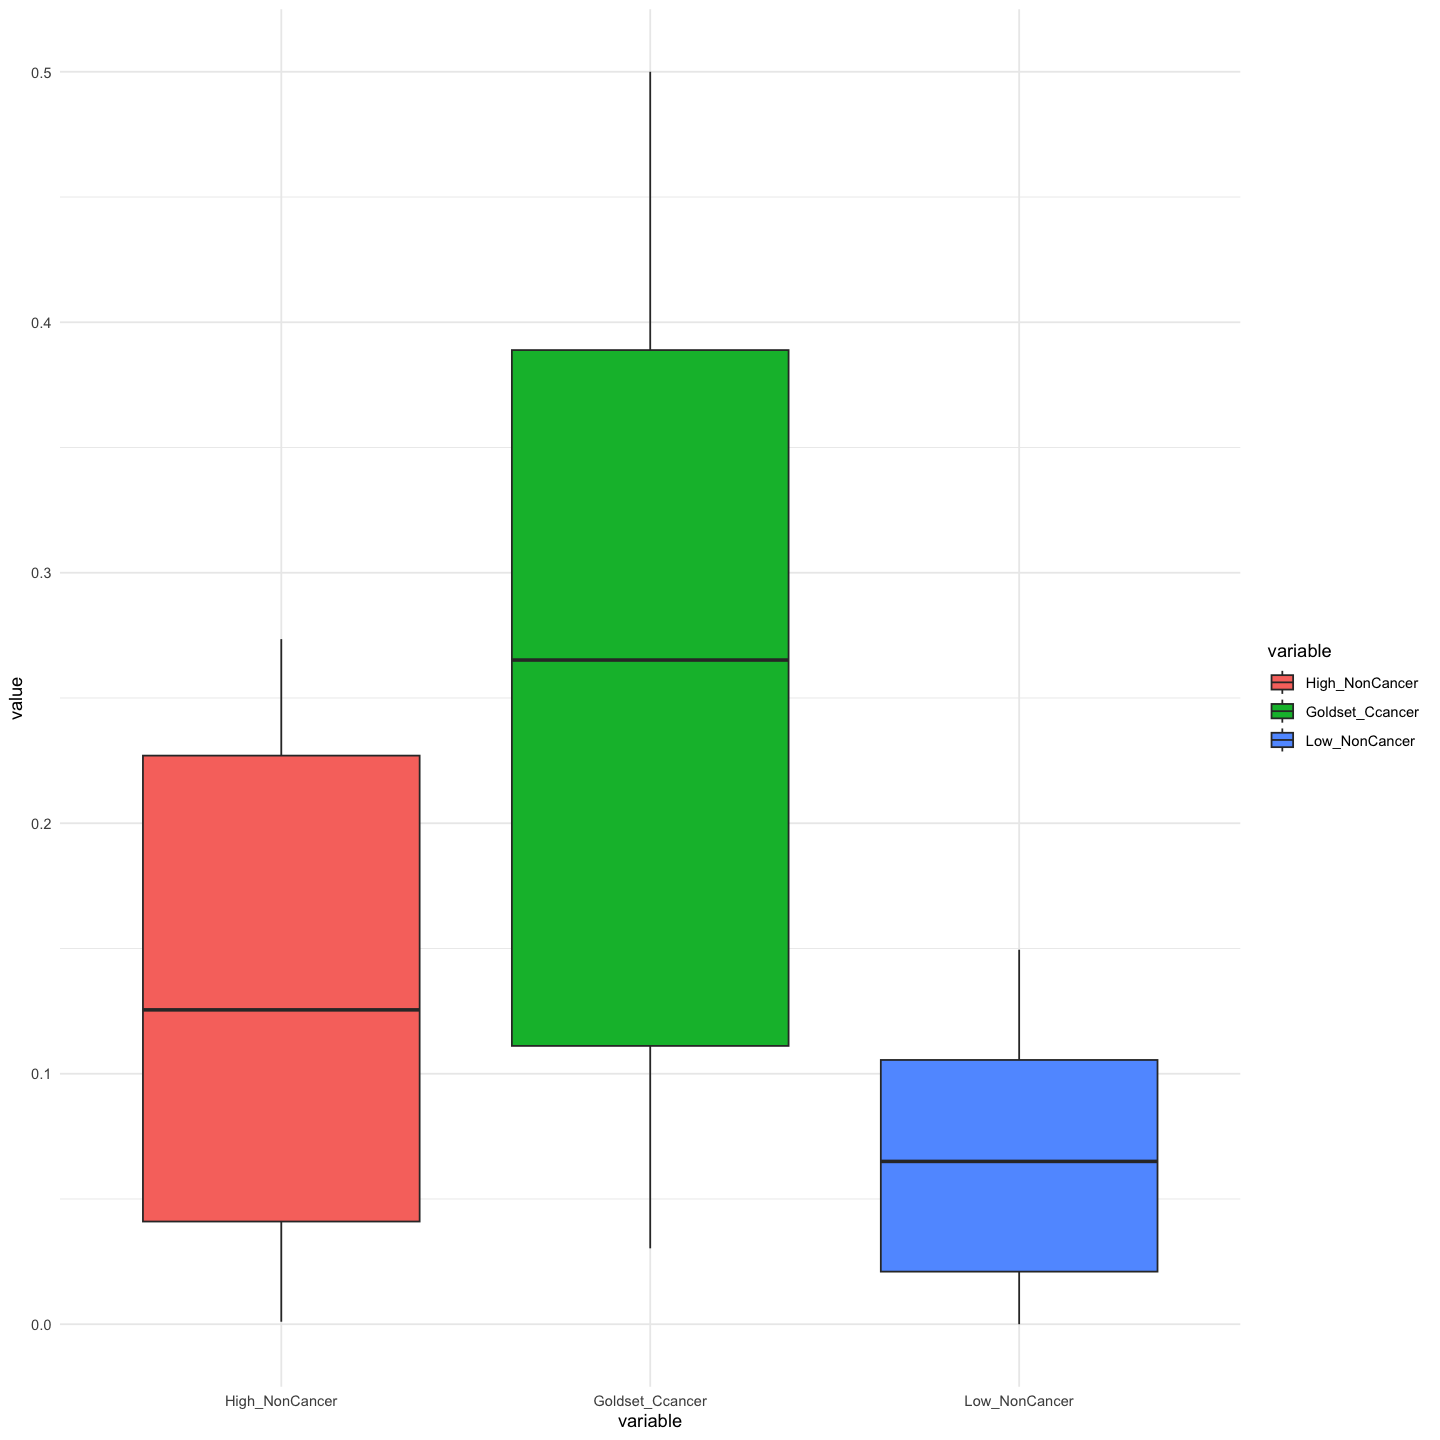

In [114]:
ggplot(reshape2::melt(deg_fraction_df), aes(y=value,x=variable, fill= variable)) + 
  geom_boxplot()  +
  scale_y_continuous(limits=c(0,.5)) +
theme_minimal()

In [115]:
fwrite(fraction_ratioDF, paste0("/Users/piyushagrawal/Downloads/Annan_Project/data/for_my_analysis/", "fractionsDF_mu.txt"))

In [116]:
mutMats <- list.files("../data/", "mutationMatrix.*")
mut_freqs <- numeric(0)
tcga_cancer_mut_freq <- list()
cancer_label <- character(0)
for(i in 1:length(mutMats)) {
    cancer_type <- gsub('mutationMatrix\\.|\\.txt','',mutMats[i])
    current_mat <- read.table(paste0("../data/",mutMats[i]),row.names=1)
    mut_freq <- apply(current_mat,1,function(x){sum(x)/length(x)})
    gene_names <- names(mut_freq)
    mut_freqs <- append(mut_freqs,mut_freq,length(mut_freq))
    cancer_label <- append(cancer_label, rep(cancer_type, length(mut_freq)),length(cancer_label))
    tcga_cancer_mut_freq[[cancer_type]] <- data.frame("Freq" = as.numeric(mut_freq), "geneName"=gene_names)
}

In [117]:
tcga_cancer_mut_freq[[1]]

Freq,geneName
<dbl>,<chr>
0.01111111,A1BG
0.02222222,A2ML1
0.01111111,A4GALT
0.01111111,AACS
0.01111111,AASDHPPT
0.01111111,AATF
0.02222222,ABCA12
0.03333333,ABCA13
0.02222222,ABCA5


In [118]:
tcga_mutation_matrix <- numeric(length(combined_recurrent))
for(i in 1:length(tcga_cancer_mut_freq)) {
    no_na <- na.omit(tcga_cancer_mut_freq[[i]])
    freq_df <- no_na

    ordered_freqs <- freq_df[order(freq_df$Freq, decreasing = T),]
    thresh <- min(ordered_freqs$Freq[1:((nrow(ordered_freqs))*.05)])

    back_thresh_freq <- freq_df[freq_df$Freq > thresh,]
    
    
    exp_freq_vec <- numeric(length(combined_recurrent))
    for(j in 1:length(combined_recurrent)){
        current_set <- combined_recurrent[[j]]
        current_name <- names(combined_recurrent)[j]
        current_foreground_total <- freq_df[freq_df$geneName %in% current_set,]
        
        fore_thresh_freq <- current_foreground_total[current_foreground_total$Freq > thresh,]
        
        exp_fisher_contingency = rbind(c(nrow(fore_thresh_freq),nrow(current_foreground_total)-nrow(fore_thresh_freq)),
                                       c(nrow(back_thresh_freq),nrow(freq_df)-nrow(back_thresh_freq)))
        
        thresh_test <- fisher.test(exp_fisher_contingency)
        
#         print("significant and positive")
#         print(exp_fisher_contingency)
#         print(paste("Pvalue: ", fisher.test(exp_fisher_contingency)$p.value, sep=""))
#         print(paste("Odds: ", fisher.test(exp_fisher_contingency)$estimate, sep=""))
#         print("")
        
        
        if(thresh_test$p.value < .05) {
            exp_freq_vec[j] = thresh_test$estimate
        } else { exp_freq_vec[j] = -1}
    }
    
    tcga_mutation_matrix <- cbind(tcga_mutation_matrix, exp_freq_vec)
    
}


In [119]:
tcga_mutation_matrix <- tcga_mutation_matrix[,2:ncol(tcga_mutation_matrix)]
colnames(tcga_mutation_matrix) <- names(tcga_cancer_mut_freq)
rownames(tcga_mutation_matrix) <- names(combined_recurrent)
tcga_mutation_matrix <- t(tcga_mutation_matrix)

In [120]:
colnames(tcga_mutation_matrix)

[1] "High_NonCancer"  "Goldset_Ccancer" "Low_NonCancer"   "HNC_DEGs"       
[5] "LNC_DEGs"

In [121]:
options(repr.plot.width=12, repr.plot.height=12)

len_mut_list <- sapply(tcga_mutation_matrix[,c(1,2,3)], length)

pheatmap(tcga_mutation_matrix[,c('upregulated.regen','downregulated.regen', 'msigdb.regen',
                       'upregulated.wound','downregulated.wound','msigdb.wound',
                       'upregulated.stress','downregulated.stress','msigdb.stress')],
         annotation_col=heatmap_annot_mut, annotation_names_col = F,
         color = colorRampPalette(c("white",'tomato1',"tomato2", "tomato3", "tomato4"))(5),
         fontsize = 14,
         breaks = c(0, 1, 2, 3, 4, 5),cluster_rows=F, cluster_cols=F)

ERROR: Error in tcga_mutation_matrix[, c("upregulated.regen", "downregulated.regen", : subscript out of bounds


In [ ]:
frequent_mutations <- list()
for(i in 1:length(tcga_cancer_mut_freq)) {
    no_na <- na.omit(tcga_cancer_mut_freq[[i]])
    freq_df <- no_na
    ordered_freqs <- freq_df[order(freq_df$Freq, decreasing = T),]
    thresh <- min(ordered_freqs$Freq[1:((nrow(ordered_freqs))*.25)])

    back_thresh_freq <- freq_df[freq_df$Freq > thresh,]
    frequent_mutations[[names(tcga_cancer_mut_freq)[i]]] <- back_thresh_freq$geneName
    
}

deg_fraction_df <- get_fraction_dataset(predicted_scores_list, frequent_mutations)
deg_fraction_df
fraction_ratioDF <- data.frame("Goldset vs High" = deg_fraction_df$Goldset_Ccancer/deg_fraction_df$High_NonCancer,
                               "Goldset vs Low" = deg_fraction_df$Goldset_Ccancer/deg_fraction_df$Low_NonCancer,
                               "High vs Low" = deg_fraction_df$High_NonCancer/deg_fraction_df$Low_NonCancer)
rownames(fraction_ratioDF) <- rownames(deg_fraction_df)
fraction_ratioDF
pheatmap(fraction_ratioDF, cluster_rows=F, cluster_cols=F,
         color = colorRampPalette(c('white',"white", "white", "firebrick3", "firebrick4"))(20),
         fontsize = 14,
         breaks = seq(0,2,.1))

In [ ]:
library("wesanderson")
ggplot(reshape2::melt(fraction_ratioDF), aes(y=value,x=variable, fill= variable)) +  # This is the plot function
  geom_boxplot()  +
  scale_y_continuous(limits=c(0,summary(reshape2::melt(fraction_ratioDF)$value)[5])) +
  geom_hline(aes(yintercept=1), colour="red") +
theme_minimal() +
scale_fill_manual(values = wes_palette("FantasticFox1", n = 3,type = "continuous"),
                    name = "Categories")+ 
    theme(text = element_text(size=25),
          legend.position="none") +
scale_x_discrete(name ="",
                 labels=c("Goldset vs. UNITe-High",
                          "Goldset vs. UNITe-Low",
                          "UNITe-High vs. UNITe-Low"))+
labs(title="Frequently Mutated Genes",x="", y = "Ratio of Fractions")

In [ ]:
flattened_comparisons <-reshape2::melt(reshape2::melt(fraction_ratioDF))
unique(flattened_comparisons$variable)

In [ ]:
gs_mut_frac <- flattened_comparisons[flattened_comparisons$variable == "Goldset.vs.High",]$value
high_mut_frac <- flattened_comparisons[flattened_comparisons$variable == "High.vs.Low",]$value
saveRDS(gs_mut_frac, "../data/for_my_analysis/gs_high_mutFrac.RDS")
saveRDS(high_mut_frac, "../data/for_my_analysis/high_low_mutFrac.RDS")